In [3]:
import sys 
sys.path.insert(0, '/home/colin/Desktop/D_BOM/src')
from OPTICS import optics

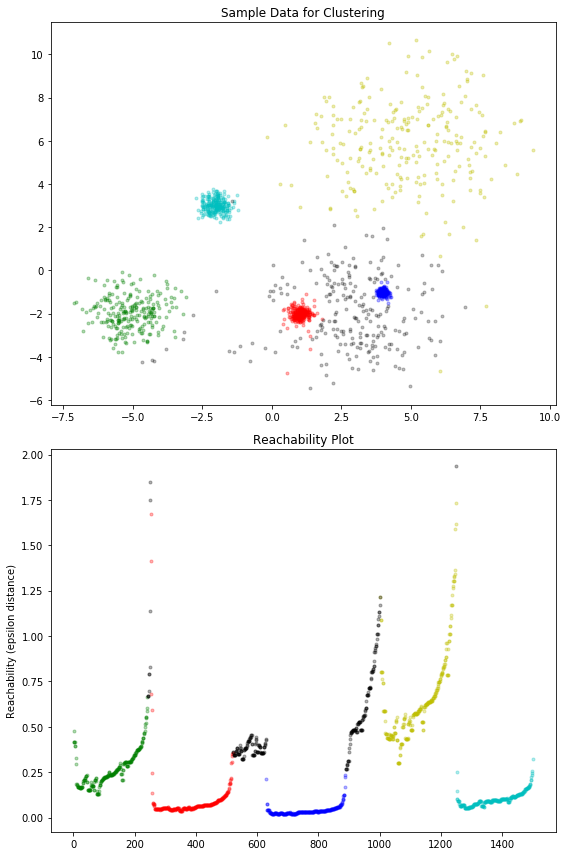

In [22]:
import matplotlib.gridspec as gridspec


import numpy as np

import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(0)
n_points_per_cluster = 250

C1 = [-5, -2] + .8 * np.random.randn(n_points_per_cluster, 2)
C2 = [4, -1] + .1 * np.random.randn(n_points_per_cluster, 2)
C3 = [1, -2] + .2 * np.random.randn(n_points_per_cluster, 2)
C4 = [-2, 3] + .3 * np.random.randn(n_points_per_cluster, 2)
C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
X = np.vstack((C1, C2, C3, C4, C5, C6))

clust = optics.OPTICS(min_samples=9, rejection_ratio=0.5)

# Run the fit
clust.fit(X)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

fig, (ax2, ax1) = plt.subplots(2, 1, figsize=(8, 12))
# Reachability plot
color = ['g.', 'r.', 'b.', 'y.', 'c.']
for k, c in zip(range(0, 5), color):
    Xk = space[labels == k]
    Rk = reachability[labels == k]
    ax1.plot(Xk, Rk, c, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha=0.3)
ax1.set_ylabel('Reachability (epsilon distance)')
ax1.set_title('Reachability Plot')

# OPTICS
color = ['g.', 'r.', 'b.', 'y.', 'c.']
for k, c in zip(range(0, 5), color):
    Xk = X[clust.labels_ == k]
    ax2.plot(Xk[:, 0], Xk[:, 1], c, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], 'k.', alpha=0.25)
ax2.set_title("Sample Data for Clustering")
plt.tight_layout()
plt.savefig('optics_example.png')
